<a href="https://colab.research.google.com/github/adityakolluru/Springboard/blob/master/Capstone1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai.structured import *
from fastai.column_data import *
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#I uploaded the flattened file as it is faster as compared to the original file which had some columns in Json format
df_train = pd.read_csv('/content/drive/My Drive/data/train_goog.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.campaignCode,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20160902,1.131660e+18,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,3.773060e+17,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3.895550e+18,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4.763450e+18,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,NaN,google + online,organic,NaN,google
4,Organic Search,20160902,2.729440e+16,27294437909732085_1472822600,Not Socially Engaged,1472822600,2,1472822600,Chrome,not available in demo dataset,...,NaN,NaN,NaN,(not set),NaN,True,(not provided),organic,NaN,google


In [0]:
df_test = pd.read_csv('/content/drive/My Drive/data/test_goog.csv')

In [6]:
df_test.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,...,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,20171016,6.167870e+18,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
1,Organic Search,20171016,6.436980e+17,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20171016,6.059380e+18,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20171016,2.376720e+18,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,20171016,2.314540e+18,2314544520795440038_1508217442,Not Socially Engaged,1508217442,1,1508217442,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


In [0]:
df1 = df_train
df2 = df_test

In [0]:
table = [df1, df2]

# Initial Exploration

In [0]:
df1.info()

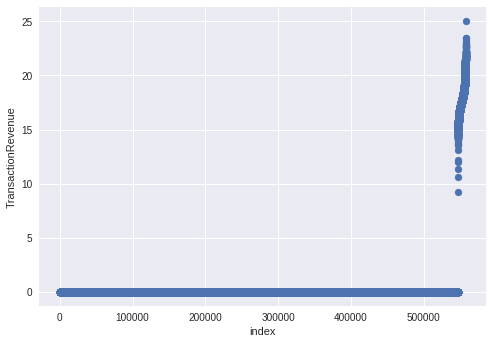

In [10]:
#PLotting log of revenue by visitorID. Seems like a small number of visitors contribute to the bulk of the Revenue

gdf = df1.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()


plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index')
plt.ylabel('TransactionRevenue')
plt.show()

In [11]:


user_null_rev = df1['totals.transactionRevenue'].isnull().sum()#Null values in revenue
user_rev = (df1['totals.transactionRevenue'] >0).sum()   # No. of customers paying
percent_paying_customers = user_rev/df1.shape[0]
percent_paying_customers                                 #percentage of paying customers

0.0127427231470487

Just 1.3% of the customers are actually paying

In [12]:
#Unique visitors are an important metric for any business. Let us look at the numnber of unique vistor ids and repeat visitors

unique_visitors = df1['fullVisitorId'].nunique()/df1.shape[0]
unique_visitors #62% of the visitors in the dataset are unique

0.6171262641744121

In [13]:
for c in df1.columns:
   if df1[c].nunique(dropna=False) == 1:
      print(c)



socialEngagementType
device.browserSize
device.browserVersion
device.flashVersion
device.language
device.mobileDeviceBranding
device.mobileDeviceInfo
device.mobileDeviceMarketingName
device.mobileDeviceModel
device.mobileInputSelector
device.operatingSystemVersion
device.screenColors
device.screenResolution
geoNetwork.cityId
geoNetwork.latitude
geoNetwork.longitude
geoNetwork.networkLocation
totals.visits
trafficSource.adwordsClickInfo.criteriaParameters


In [14]:
df1.shape

(903653, 55)

In [0]:
# Convert date from object to datetime
df1['date'] = pd.to_datetime(df1['date'], format = '%Y%m%d')

# Get the month value from date
df1['Month'] = df1['date'].dt.month

# Get the week value from date
df1['Week'] = df1['date'].dt.week

# Get the weekday value from date
df1['Weekday'] = df1['date'].dt.weekday

# Get the quarter value from date
df1['Quarter'] = df1['date'].dt.quarter

# Get hour from visitStartTime column
df1['Hour'] = pd.to_datetime(df1['visitStartTime'], unit='s').dt.hour

In [16]:
df1.shape

(903653, 60)

In [17]:
df1['visitStartTime'].head()   

0    1472830385
1    1472880147
2    1472865386
3    1472881213
4    1472822600
Name: visitStartTime, dtype: int64

In [0]:
df1[['fullVisitorId', 'visitId', 'sessionId']] #session Id is just a combination of fullvisitorId and visitId and it can dropped
#fullvisitorId and visitId will be converted to strings

In [0]:
#Convert visitor id, visit id and  to Strings
df1['fullVisitorId'] = df1['fullVisitorId'].astype('object')
df1['visitId'] = df1['visitId'].astype('object')

In [0]:
#Drop columns which are null
df1.pop('trafficSource.campaignCode')
df1.pop('socialEngagementType')
df1.pop('device.browserSize')
df1.pop('device.browserVersion')
df1.pop('device.flashVersion')
df1.pop('device.language')
df1.pop('device.mobileDeviceBranding')
df1.pop('device.mobileDeviceInfo')
df1.pop('device.mobileDeviceMarketingName')
df1.pop('device.mobileDeviceModel')
df1.pop('device.mobileInputSelector')
df1.pop('device.operatingSystemVersion')
df1.pop('device.screenColors')
df1.pop('device.screenResolution')
df1.pop('geoNetwork.cityId')
df1.pop('geoNetwork.latitude')
df1.pop('geoNetwork.longitude')
df1.pop('trafficSource.adwordsClickInfo.criteriaParameters')
df1.pop('geoNetwork.networkLocation')
df1.pop('sessionId')

In [24]:
df1.shape

(903653, 40)

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 903653 entries, 0 to 903652
Data columns (total 40 columns):
channelGrouping                                 903653 non-null object
date                                            903653 non-null datetime64[ns]
fullVisitorId                                   903653 non-null object
visitId                                         903653 non-null object
visitNumber                                     903653 non-null int64
visitStartTime                                  903653 non-null int64
device.browser                                  903653 non-null object
device.deviceCategory                           903653 non-null object
device.isMobile                                 903653 non-null bool
device.operatingSystem                          903653 non-null object
geoNetwork.city                                 903653 non-null object
geoNetwork.continent                            903653 non-null object
geoNetwork.country               

Will explore the remianing device columns to understand them

In [34]:
#Exploring deviceCategory and is.mobile columns
df1.groupby(['device.deviceCategory', 'device.isMobile']).size()

device.deviceCategory  device.isMobile
desktop                False              664369
                       True                  110
mobile                 False                 147
                       True               208578
tablet                 False                  14
                       True                30435
dtype: int64

Not sure why a few entries in Desktop are classified as True in is.mobile and some tablets and mobile are classified as False in Mobile. But overall this columns seems to be redundant and we can remove it

In [0]:
df1.pop('device.isMobile')

In [44]:
df1.groupby(['device.operatingSystem']).size().sort_values()

device.operatingSystem
Nintendo 3DS          1
SunOS                 1
NTT DoCoMo            1
OpenBSD               2
Nokia                 2
FreeBSD               9
Nintendo WiiU        35
Xbox                 66
Firefox OS           89
Nintendo Wii        100
BlackBerry          218
Samsung             280
Windows Phone      1216
(not set)          4695
Chrome OS         26337
Linux             35034
iOS              107665
Android          123892
Macintosh        253938
Windows          350072
dtype: int64

Might make sense to group everything below Windows phone into other.

In [45]:
df1.groupby(['device.browser']).size().sort_values()

device.browser
M5                                                  1
[Use default User-agent string] LIVRENPOCHE         1
User Agent                                          1
TCL P500M                                           1
Reddit                                              1
Konqueror                                           1
IE with Chrome Frame                                1
Hisense M20-M_LTE                                   1
HTC802t_TD                                          1
DoCoMo                                              1
subjectAgent: NoticiasBoom                          1
CSM Click                                           1
ADM                                                 1
Changa 99695759                                     1
YE                                                  2
NokiaE52-1                                          2
MQQBrowser                                          2
Android Runtime                                     2
no-ua        

Might make sense to group everything below Android into other other

Will explore geography columns next

In [62]:
df1[['geoNetwork.city', 'geoNetwork.continent', 'geoNetwork.country', 'geoNetwork.metro', 'geoNetwork.networkDomain', 'geoNetwork.region',
'geoNetwork.subContinent']]

,geoNetwork.city,geoNetwork.continent,geoNetwork.country,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.region,geoNetwork.subContinent
0,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia
1,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia
2,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe
3,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia
4,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe
5,not available in demo dataset,Europe,Italy,not available in demo dataset,fastwebnet.it,not available in demo dataset,Southern Europe
6,not available in demo dataset,Asia,Pakistan,not available in demo dataset,unknown.unknown,not available in demo dataset,Southern Asia
7,Brisbane,Oceania,Australia,(not set),bigpond.net.au,Queensland,Australasia
8,not available in demo dataset,Europe,Austria,not available in demo dataset,spar.at,not available in demo dataset,Western Europe
9,not available in demo dataset,Europe,Netherlands,not available in demo dataset,chello.nl,not available in demo dataset,Western Europe


In [0]:
df1.groupby(['geoNetwork.networkDomain']).size().sort_values()

Everything below 2000, unknown and not set could be set to other

In [68]:
df1.groupby(['geoNetwork.continent','geoNetwork.subContinent']).size() #these 2 columns looks good

geoNetwork.continent  geoNetwork.subContinent
(not set)             (not set)                    1468
Africa                Eastern Africa               1927
                      Middle Africa                 393
                      Northern Africa              7683
                      Southern Africa              2169
                      Western Africa               2573
Americas              Caribbean                    2406
                      Central America             15583
                      Northern America           390657
                      South America               41731
Asia                  Central Asia                 1215
                      Eastern Asia                46919
                      Southeast Asia              77800
                      Southern Asia               59321
                      Western Asia                38443
Europe                Eastern Europe              45249
                      Northern Europe             58168
  

In [0]:
df1.groupby(['geoNetwork.city']).size() #half the entries are not set

In [0]:
df1.groupby(['geoNetwork.region']).size().sort_values() #half the entries are not set and also this seems to be represented under city

In [0]:
df1.groupby(['geoNetwork.metro']).size().sort_values() #70% the entries are not set and also this seems to be represented under city

Exploring totals columns next

In [0]:
#replaceing null values in revenue columns with zeros
df1['totals.transactionRevenue'].fillna(0, inplace = True)

In [0]:
df1[['totals.bounces', 'totals.hits', 'totals.newVisits', 'totals.pageviews', 'totals.visits']]

In [52]:
df1.groupby('totals.bounces').size()   #A bounce is a single-page session on your site. I will replace this column with boolean

totals.bounces
False    453023
True     450630
dtype: int64

In [0]:
#Change Bounce into True and False
df1['totals.bounces'] = df1['totals.bounces'].replace(1.0, True)
df1['totals.bounces'] = df1['totals.bounces'].fillna(False)

In [60]:
#Checking if bounces column is correct. If pageviews is greater than 1 then bounces should be false
filter_pageviews = df1[df1['totals.pageviews']>1]
filter_pageviews  = filter_pageviews.groupby('totals.bounces').size()
filter_pageviews

totals.bounces
False    451031
dtype: int64

Bounces seems about right

In [0]:
#Will change new visits similarly. Convert them to boolean

#convert New Visit into True and False
df1['totals.newVisits'] = df1['totals.newVisits'].replace(1.0, True)
df1['totals.newVisits'] = df1['totals.newVisits'].fillna(False)

Questions: What format should I use to convert visitStartTimecolumn
2) Should I drop date column at this stage
3) What other features should I extract from the date column
4) Should I have date as an index?
5)Should I convert the columns to Category at this stage?

# Digging in somemore

In [74]:
df1.describe()

,visitNumber,visitStartTime,totals.hits,totals.pageviews,totals.transactionRevenue,totals.visits,trafficSource.adwordsClickInfo.page,Month,Week,Weekday,Quarter,Hour
count,903653.000000,9.036530e+05,903653.000000,903553.000000,9.036530e+05,903653.0,21460.000000,903653.000000,903653.000000,903653.000000,903653.000000,903653.000000
mean,2.264897,1.485007e+09,4.596538,3.849764,1.704273e+06,1.0,1.008108,6.987671,28.483667,2.735183,2.669002,12.529160
std,9.283735,9.022124e+06,9.641437,7.025274,5.277866e+07,0.0,0.173584,3.484576,15.108878,1.929072,1.140269,6.825449
min,1.000000,1.470035e+09,1.000000,1.000000,0.000000e+00,1.0,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,1.000000,1.477561e+09,1.000000,1.000000,0.000000e+00,1.0,1.000000,4.000000,15.000000,1.000000,2.000000,7.000000
50%,1.000000,1.483949e+09,2.000000,1.000000,0.000000e+00,1.0,1.000000,7.000000,30.000000,3.000000,3.000000,14.000000
75%,1.000000,1.492759e+09,4.000000,4.000000,0.000000e+00,1.0,1.000000,10.000000,42.000000,4.000000,4.000000,18.000000
max,395.000000,1.501657e+09,500.000000,469.000000,2.312950e+10,1.0,14.000000,12.000000,52.000000,6.000000,4.000000,23.000000


In [75]:
# Current Columns
df1.columns

Index(['channelGrouping', 'date', 'fullVisitorId', 'visitId', 'visitNumber',
       'visitStartTime', 'device.browser', 'device.deviceCategory',
       'device.operatingSystem', 'geoNetwork.city', 'geoNetwork.continent',
       'geoNetwork.country', 'geoNetwork.metro', 'geoNetwork.networkDomain',
       'geoNetwork.region', 'geoNetwork.subContinent', 'totals.bounces',
       'totals.hits', 'totals.newVisits', 'totals.pageviews',
       'totals.transactionRevenue', 'totals.visits', 'trafficSource.adContent',
       'trafficSource.adwordsClickInfo.adNetworkType',
       'trafficSource.adwordsClickInfo.gclId',
       'trafficSource.adwordsClickInfo.isVideoAd',
       'trafficSource.adwordsClickInfo.page',
       'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign',
       'trafficSource.isTrueDirect', 'trafficSource.keyword',
       'trafficSource.medium', 'trafficSource.referralPath',
       'trafficSource.source', 'Month', 'Week', 'Weekday', 'Quarter', 'Hour'],
      dtype='o

Figuring out the deal with the trafficsource columns

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


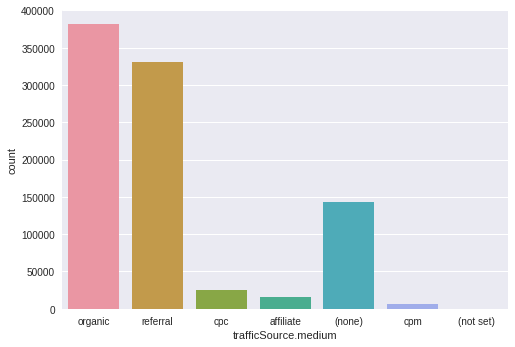

In [76]:
#Bar plot to check the categories of Traffic Sources
sns.countplot(x = 'trafficSource.medium', data = df1)

Looking to understand why there are a large number of (none) in the medium column

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


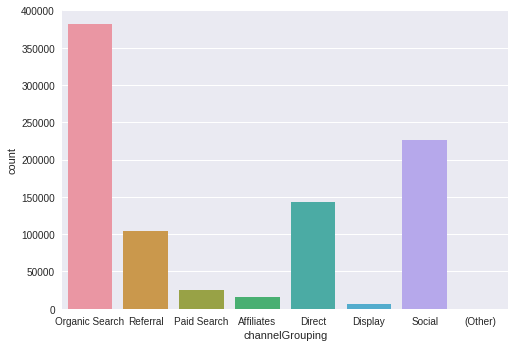

In [77]:
#this column is very similar to the column above
sns.countplot(x = 'channelGrouping', data = df1)

In [78]:
df1.groupby('channelGrouping')['channelGrouping'].count()

channelGrouping
(Other)              120
Affiliates         16403
Direct            143026
Display             6262
Organic Search    381561
Paid Search        25326
Referral          104838
Social            226117
Name: channelGrouping, dtype: int64

 Seems like trafficsource. medium and channel grouping are similar but 'Direct' is grouped as none under trafficesource.medium column

In [0]:
display_search = df1[df1['trafficSource.medium']== 'Display(CPM)']

In [0]:
display_search[['trafficSource.adContent', 'trafficSource.adwordsClickInfo.adNetworkType',        
'trafficSource.adwordsClickInfo.gclId', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adwordsClickInfo.page', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign']]

In [0]:
df1.groupby(['trafficSource.medium', 'trafficSource.adContent'])['trafficSource.adContent'].count()

In [0]:
paid_search = df1[df1['trafficSource.medium']== 'Paid Search(CPC)']

In [0]:
paid_search[['trafficSource.adContent', 'trafficSource.adwordsClickInfo.adNetworkType',        
'trafficSource.adwordsClickInfo.gclId', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adwordsClickInfo.page', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign']]

In [115]:
paid_search['trafficSource.adwordsClickInfo.adNetworkType'].count()

21460

All the adword columns fall under Paid Search(CPC)

In [0]:
df1.groupby('trafficSource.campaign')['trafficSource.campaign'].count()

In [0]:
df1.groupby('trafficSource.adwordsClickInfo.slot')['trafficSource.adwordsClickInfo.slot'].count()

clickinfo.slot gives the placement of the adwork

In [0]:
df1.groupby('trafficSource.adwordsClickInfo.page')['trafficSource.adwordsClickInfo.page'].count()

Probably gives the page number of the clicked adwords

In [30]:
df1[df1['trafficSource.source'] == '(direct)']['trafficSource.source'].count()

143028

In [122]:
you_tubevideo = df1[(df1['trafficSource.source'].str.contains("tube")) & (df1['trafficSource.medium']== 'Paid Search(CPC)')]
you_tubevideo

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device.browser,device.deviceCategory,device.isMobile,...,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source,Month,Week,Weekday,Quarter,Hour


In [0]:
# Replacing CMC, CPC and (none) in medium with Paid Search (CPC), Display(CPM) and Direct
df1['trafficSource.medium'] = df1['trafficSource.medium'].str.replace('cpc', 'Paid Search(CPC)')
df1['trafficSource.medium'] = df1['trafficSource.medium'].str.replace('cpm', 'Display(CPM)')
df1['trafficSource.medium'] = df1['trafficSource.medium'].str.replace('(none)', 'Direct')
df1['trafficSource.medium'] = df1['trafficSource.medium'].str.replace('organic', 'Organic Search')
df1['trafficSource.medium'] = df1['trafficSource.medium'].str.replace('referral', 'Referral')
df1['trafficSource.medium'] = df1['trafficSource.medium'].str.replace('affiliate', 'Affiliates')
df1['channelGrouping'] = df1['channelGrouping'].str.replace('Paid Search', 'Paid Search(CPC)')
df1['channelGrouping'] = df1['channelGrouping'].str.replace('Display', 'Display(CPM)')



'Direct' channel is represented similarly under trafficSource.source column as well 

In [22]:
#Exploring the trafficSource.isTrueDirect column
df1[df1['trafficSource.isTrueDirect']== True]['trafficSource.isTrueDirect'].count()

274005

The number of Direct is higher than the above 3 columns. There are 143,028 in above columns and 274,005 in trafficSource.isTrueDirect column

In [0]:
#Replacing the null values in trafficSource.isTrueDirect column with False
df1['trafficSource.isTrueDirect'] = df1['trafficSource.isTrueDirect'].fillna(False)

In [36]:
direct_source = df1[df1['trafficSource.isTrueDirect'] == True]['channelGrouping'].value_counts().sort_index()
direct_source

(Other)               18
Affiliates          2937
Direct            143024
Display             1615
Organic Search     68134
Paid Search         4789
Referral           40356
Social             13132
Name: channelGrouping, dtype: int64

Looks like some of the direct might be wrongly classified





In [114]:
df1.groupby('trafficSource.adwordsClickInfo.adNetworkType')['trafficSource.adwordsClickInfo.adNetworkType'].count()

trafficSource.adwordsClickInfo.adNetworkType
Google Search      21453
Search partners        7
Name: trafficSource.adwordsClickInfo.adNetworkType, dtype: int64

In [0]:
# Exploring adwords
df1[['trafficSource.adContent', 'trafficSource.adwordsClickInfo.adNetworkType',        
'trafficSource.adwordsClickInfo.gclId', 'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.adwordsClickInfo.page', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.campaign']]

In [0]:
df1.groupby(['trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adContent'])['trafficSource.adContent'].count()

In [0]:
df1.groupby(['trafficSource.adContent', 'trafficSource.adwordsClickInfo.isVideoAd'])['trafficSource.adContent'].count()

In [0]:
df1.groupby('trafficSource.adContent')['trafficSource.adContent'].count()

the isvideoad column only has False Values. One idea is to replace evrrything which is not organic and Youtube as True for this column 

In [0]:
df1[df1['trafficSource.adwordsClickInfo.isVideoAd'].isnull()]

In [0]:
df1.groupby('geoNetwork.country')['totals.transactionRevenue'].sum()

# EDA

Text(0,0.5,'Revenue')

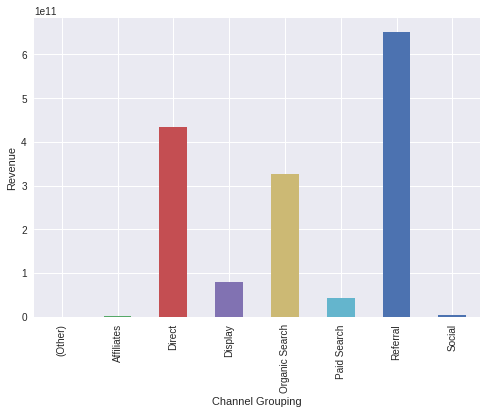

In [116]:
#Revenue by Channel
df1.groupby('channelGrouping')['totals.transactionRevenue'].sum().plot(kind = 'bar')
plt.xlabel("Channel Grouping")
plt.ylabel("Revenue")

Text(0,0.5,'Traffic')

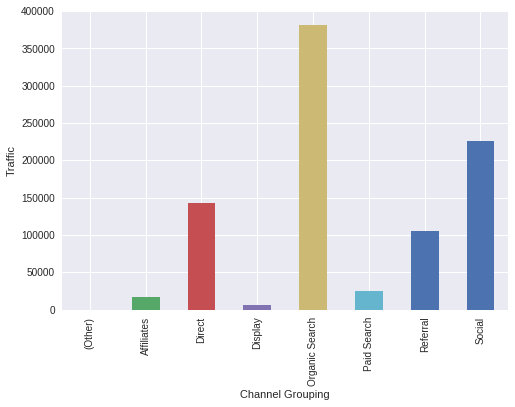

In [117]:
#Traffic by Channel
df1.groupby('channelGrouping')['visitId'].count().plot(kind = 'bar')
plt.xlabel("Channel Grouping")
plt.ylabel("Traffic")

Text(0,0.5,'Total Revenue/Total Visitors')

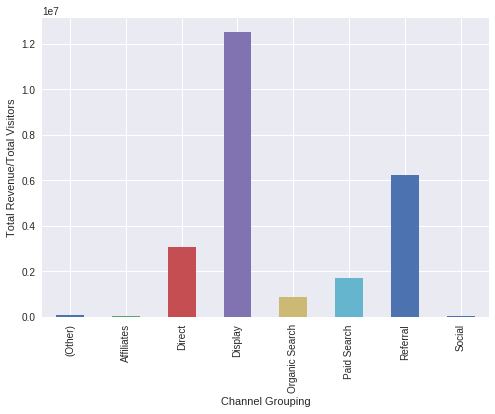

In [118]:
#Traffic to revenue ratio
(df1.groupby('channelGrouping')['totals.transactionRevenue'].sum()/df1.groupby('channelGrouping')['visitId'].count()).plot(kind = 'bar')
plt.xlabel("Channel Grouping")
plt.ylabel("Total Revenue/Total Visitors")


Display channel has the highest paying customer base

In [0]:
#Traffic by country (top 20)
traffic_country = df1[df1['totals.transactionRevenue'] >= 4000]
traffic_country.groupby('geoNetwork.region').size()

In [0]:
#Revenue by country (top 20)
df1.groupby('channelGrouping')['totals.transactionRevenue'].count().plot(kind = 'bar')

Text(0,0.5,'Traffic')

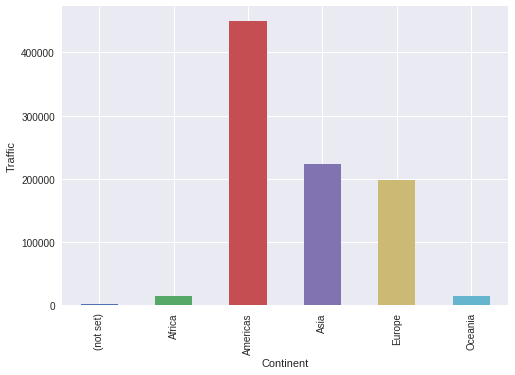

In [121]:
#Traffic by continent
df1.groupby('geoNetwork.continent')['visitId'].count().plot(kind = 'bar')
plt.xlabel("Continent")
plt.ylabel("Traffic")

Text(0,0.5,'Revenue')

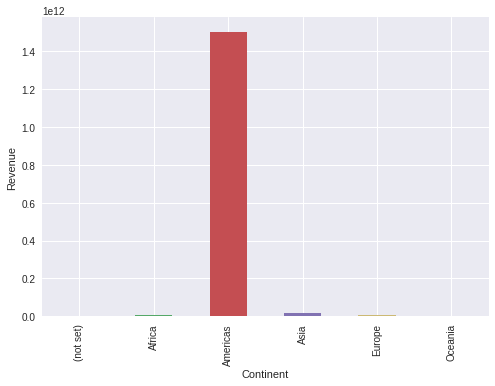

In [128]:
#Revenue by continent
df1.groupby('geoNetwork.continent')['totals.transactionRevenue'].sum().plot(kind = 'bar')
plt.xlabel("Continent")
plt.ylabel("Revenue")

Text(0,0.5,'Traffic')

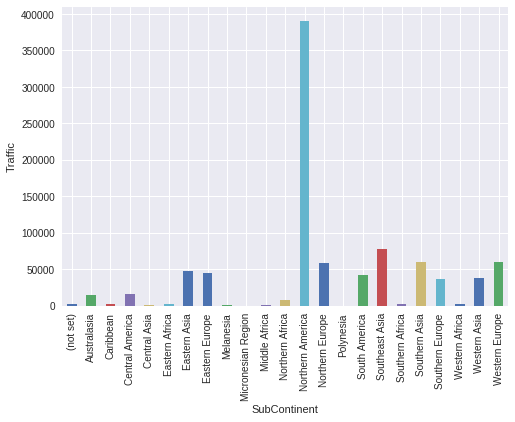

In [122]:
#Traffic by subcontinent
df1.groupby('geoNetwork.subContinent')['visitId'].count().plot(kind = 'bar')
plt.xlabel("SubContinent")
plt.ylabel("Traffic")

Text(0,0.5,'Revenue')

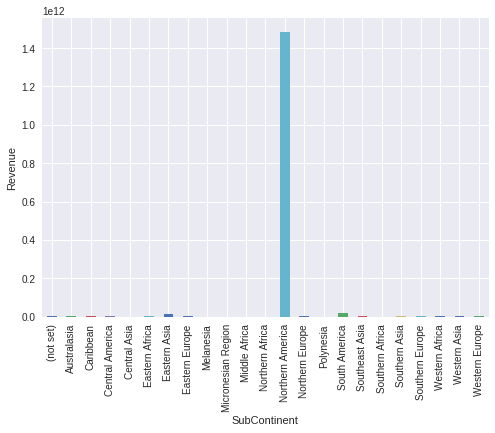

In [126]:
#Revenue by subcontinent
df1.groupby('geoNetwork.subContinent')['totals.transactionRevenue'].sum().plot(kind = 'bar')
plt.xlabel("SubContinent")
plt.ylabel("Revenue")

Text(0,0.5,'Traffic')

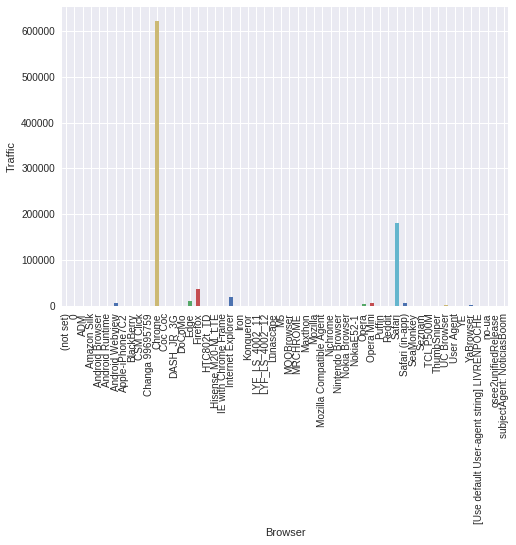

In [134]:
df1.groupby('device.browser')['visitId'].count().plot(kind = 'bar')
plt.xlabel("Browser")
plt.ylabel("Traffic")

Text(0,0.5,'Traffic')

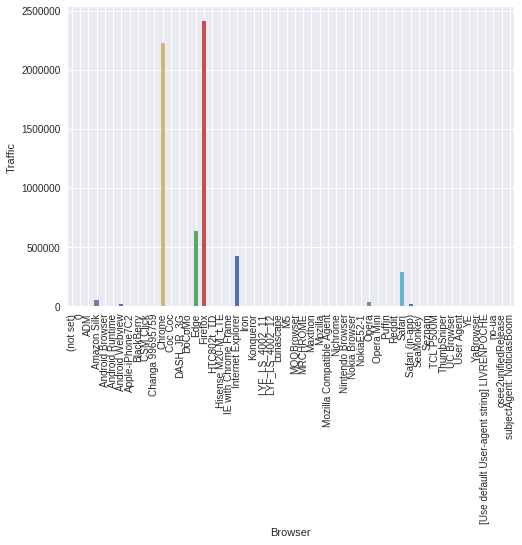

In [133]:
#Traffic by Browser
(df1.groupby('device.browser')['totals.transactionRevenue'].sum()/df1.groupby('device.browser')['visitId'].count()).plot(kind = 'bar')
plt.xlabel("Browser")
plt.ylabel("Traffic")

Revenue to traffic ratio is quite high for Firefox

I will create 3 subplots for each metric

ValueError: ignored

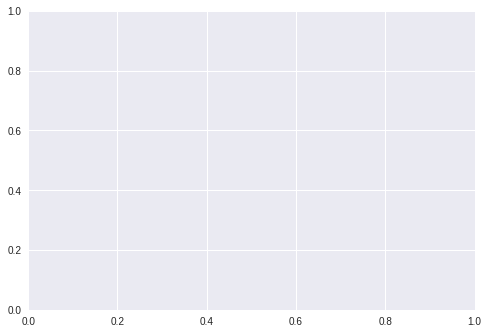

In [129]:
#Visitor Plots
_ = plt.plot(x = 'date', y = 'visitId', data = df1, kind = 'line')

# New Features

In [56]:
#What is the revenue by unique and non -unique customers. if revenue by non-unique is more
#then we should see the time between visits if that had corellation. if it does then it can be a feature and added into the model
unique_vistors = df1['fullVisitorId'].unique()
unique_vistors

array([1.13166e+18, 3.77306e+17, 3.89555e+18, ..., 2.14015e+18, 5.12378e+18, 5.74458e+18], dtype=object)

In [0]:
#time since last visit could be an important feature. Hypothesis: If time between visits is less there is a higher chance of purchase
df1['timesincelastvisit'] = df1.sort_values(['fullVisitorId', 'visitStartTime']).groupby('fullVisitorId')['visitStartTime'].diff()

In [0]:
# Get hour from timesincelastvisit column
df1['timesincelastvisit_Hour'] = pd.to_datetime(df1['timesincelastvisit'], unit='s').dt.hour

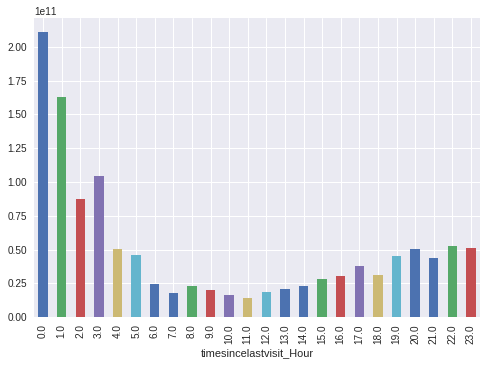

In [115]:
df1.groupby(['timesincelastvisit_Hour'])['totals.transactionRevenue'].sum().plot(kind = 'bar')

Not sure how to replace null values

In [111]:
filter1 = df1['timesincelastvisit_Hour'] >=0
visit_time = df1[filter1]['totals.transactionRevenue'].sum()
visit_time

1212720270000.0

In [112]:
visit_time/df1['totals.transactionRevenue'].sum()

0.7874442678378956

78% of the revenue comes from repeat visitors

#Model - ML

In [0]:
df1[df1.select_dtypes(['object']).columns] = df1.select_dtypes(['object']).apply(lambda x: x.astype('category'))

In [0]:
le = LabelEncoder()
df1[df1.select_dtypes(['category']).columns] = le.fit_transform(df1.select_dtypes(['category']).columns)

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor

In [0]:
m = RandomForestRegressor(n_jobs = -1)
m.fit(df1.drop(['totals.transactionRevenue', 'visitStartTime', 'date', 'trafficSource.adContent', 'trafficSource.adwordsClickInfo.adNetworkType', 'trafficSource.adwordsClickInfo.gclId', 'trafficSource.adwordsClickInfo.isVideoAd','trafficSource.adwordsClickInfo.page', 'trafficSource.adwordsClickInfo.slot', 'trafficSource.isTrueDirect', 'trafficSource.keyword'],axis = 1), df1['totals.transactionRevenue'])